In [1]:
#!/usr/bin/env python 
# -*- coding:utf-8 -*-
%matplotlib inline
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor

# 数据预处理

In [14]:
train_data = pd.read_csv('D:/statistics/machine learning in action/GiveMeSomeCredit/cs-training.csv')
del train_data['Unnamed: 0']
pd.set_option('display.max_columns', None)
order = ['SeriousDlqin2yrs', 'age', 'NumberOfDependents', 'MonthlyIncome', 'DebtRatio', 'RevolvingUtilizationOfUnsecuredLines',
         'NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines',
         'NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate']
train_data = train_data[order]
print (train_data.head(5))
print(train_data.info())
print(train_data.describe())
print(train_data.shape)


   SeriousDlqin2yrs  age  NumberOfDependents  MonthlyIncome  DebtRatio  \
0                 1   45                 2.0         9120.0   0.802982   
1                 0   40                 1.0         2600.0   0.121876   
2                 0   38                 0.0         3042.0   0.085113   
3                 0   30                 0.0         3300.0   0.036050   
4                 0   49                 0.0        63588.0   0.024926   

   RevolvingUtilizationOfUnsecuredLines  NumberOfOpenCreditLinesAndLoans  \
0                              0.766127                               13   
1                              0.957151                                4   
2                              0.658180                                2   
3                              0.233810                                5   
4                              0.907239                                7   

   NumberRealEstateLoansOrLines  NumberOfTime30-59DaysPastDueNotWorse  \
0                        

In [15]:
#数据预处理之填补缺失值MonsthlyIncome
def set_missing(df):
    newdata = df.iloc[ :,[3,0,1,4,5,6,7,8,9,10]]
    kown = newdata[newdata.MonthlyIncome.notnull()].as_matrix()
    unkown = newdata[newdata.MonthlyIncome.isnull()].as_matrix()
    X=kown[:,1:]
    Y=kown[:,0]
    rfr = RandomForestRegressor(random_state=0,n_estimators=200,max_depth=3,n_jobs=-1)
    rfr.fit(X,Y)
    predictions = rfr.predict(unkown[:, 1:]).round(0)
    print(predictions)
    df.loc[df.MonthlyIncome.isnull(), 'MonthlyIncome'] = predictions
    return df
data = set_missing(train_data)

#去掉缺失NumberOfDependents的行
data = data.dropna()
data = data.drop_duplicates()
print(data.shape)

#去掉不合理的异常值
data = data[data.age>0]
data = data[data.age<100]
data = data[data['NumberOfTime30-59DaysPastDueNotWorse']<90]

print(data.info())
print(data.describe())

[8311. 1159. 8311. ... 1159. 2554. 2554.]
(145563, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 145344 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        145344 non-null int64
age                                     145344 non-null int64
NumberOfDependents                      145344 non-null float64
MonthlyIncome                           145344 non-null float64
DebtRatio                               145344 non-null float64
RevolvingUtilizationOfUnsecuredLines    145344 non-null float64
NumberOfOpenCreditLinesAndLoans         145344 non-null int64
NumberRealEstateLoansOrLines            145344 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    145344 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    145344 non-null int64
NumberOfTimes90DaysLate                 145344 non-null int64
dtypes: float64(4), int64(7)
memory usage: 13.3 MB
None
       SeriousDlqin2yrs            age  NumberOfDependents  MonthlyIncome  \
count     1

# EDA探索数据分布及其与结果间的相关关系

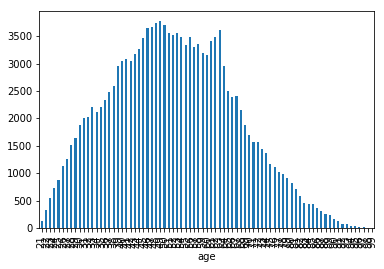

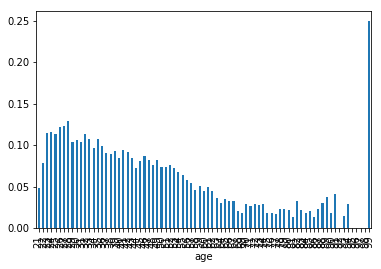

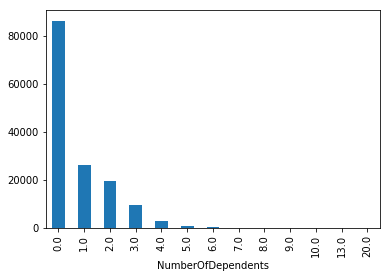

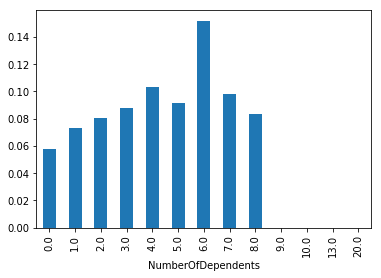

In [20]:
#age
data.groupby(['age'])['age'].count().plot.bar()
plt.show()
data.groupby(['age'])['SeriousDlqin2yrs'].mean().plot.bar()
plt.show()
#NumberOfDependents
data.groupby(['NumberOfDependents'])['NumberOfDependents'].count().plot.bar()
plt.show()
data.groupby(['NumberOfDependents'])['SeriousDlqin2yrs'].mean().plot.bar()
plt.show()

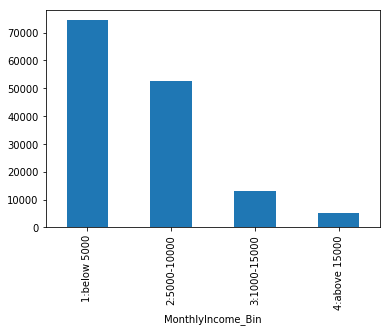

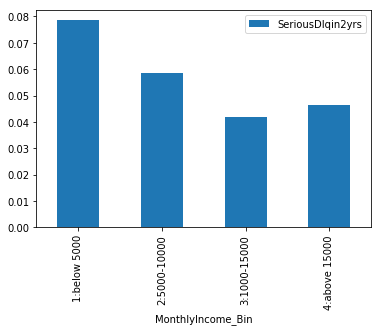

In [18]:
# 使用cut函数，将连续变量转换成分类变量
def binning(col, cut_points, labels=None, isright=True):
    val_min = col.min()
    val_max = col.max()
    break_points = [val_min] + cut_points + [val_max]
    if not labels:
        labels = range(len(cut_points) + 1)
    else:
        labels = [str(i + 1) + ':' + labels[i] for i in range(len(cut_points) + 1)]
    colbin = pd.cut(col, bins=break_points, labels=labels, include_lowest=True, right=isright)
    return colbin
#MonthlyIncome
df_tmp = data[['SeriousDlqin2yrs', 'MonthlyIncome']]
cut_points=[5000,10000,15000]
labels=['below 5000', '5000-10000','1000-15000','above 15000']
df_tmp['MonthlyIncome_Bin'] = binning(df_tmp['MonthlyIncome'], cut_points, labels)
df_tmp.groupby(['MonthlyIncome_Bin'])['MonthlyIncome_Bin'].count().plot.bar()
plt.show()
df_tmp[['MonthlyIncome_Bin','SeriousDlqin2yrs']].groupby(['MonthlyIncome_Bin']).mean().plot.bar()
plt.show()

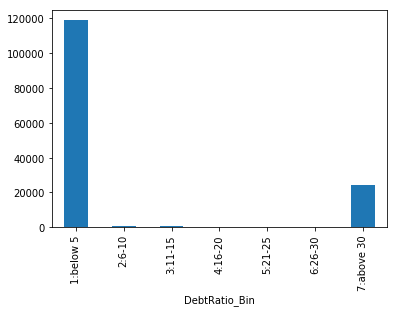

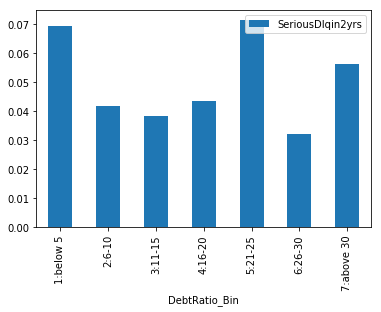

In [21]:
#Debtratio
df_tmp = data[['SeriousDlqin2yrs', 'DebtRatio']]
cut_points=[5,10,15,20,25,30]
labels=['below 5', '6-10', '11-15','16-20','21-25','26-30','above 30']
df_tmp['DebtRatio_Bin'] = binning(df_tmp['DebtRatio'], cut_points, labels)
df_tmp.groupby(['DebtRatio_Bin'])['DebtRatio_Bin'].count().plot.bar()
plt.show()
df_tmp[['DebtRatio_Bin','SeriousDlqin2yrs']].groupby(['DebtRatio_Bin']).mean().plot.bar()
plt.show()

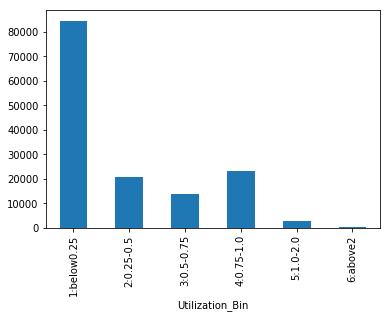

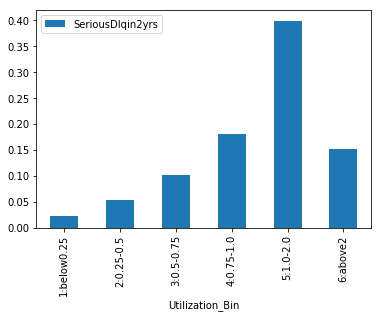

In [22]:
# RevolvingUtilizationOfUnsecuredLines
df_tmp = data[['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines']]
cut_points = [0.25, 0.5, 0.75, 1, 2]
labels = ['below0.25', '0.25-0.5', '0.5-0.75', '0.75-1.0', '1.0-2.0', 'above2']
df_tmp['Utilization_Bin'] = binning(df_tmp['RevolvingUtilizationOfUnsecuredLines'], cut_points, labels)
df_tmp.groupby(['Utilization_Bin'])['Utilization_Bin'].count().plot.bar()
plt.show()
df_tmp.groupby(['Utilization_Bin','SeriousDlqin2yrs'])['SeriousDlqin2yrs'].count()
df_tmp[['Utilization_Bin','SeriousDlqin2yrs']].groupby(['Utilization_Bin']).mean().plot.bar()
plt.show()

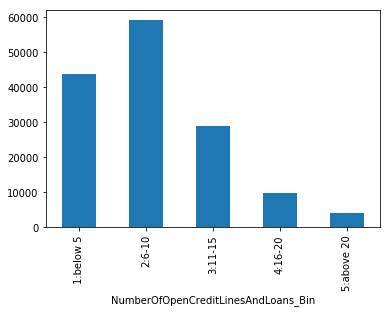

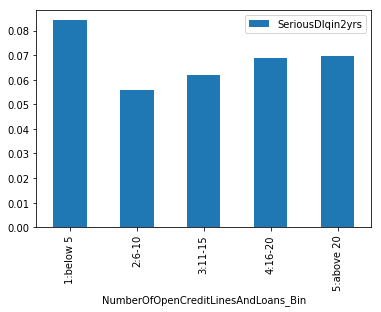

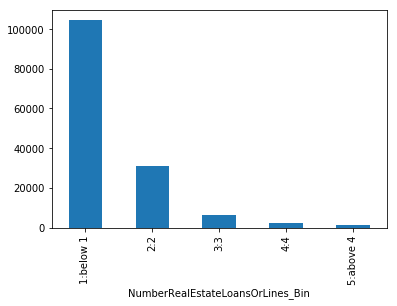

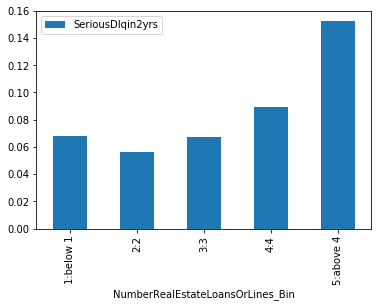

In [25]:
#NumberOfOpenCreditLinesAndLoans
df_tmp = data[['SeriousDlqin2yrs', 'NumberOfOpenCreditLinesAndLoans']]
cut_points=[5,10,15,20]
labels=['below 5', '6-10', '11-15','16-20','above 20']
df_tmp['NumberOfOpenCreditLinesAndLoans_Bin'] = binning(df_tmp['NumberOfOpenCreditLinesAndLoans'], cut_points, labels)
df_tmp.groupby(['NumberOfOpenCreditLinesAndLoans_Bin'])['NumberOfOpenCreditLinesAndLoans_Bin'].count().plot.bar()
plt.show()
df_tmp[['NumberOfOpenCreditLinesAndLoans_Bin','SeriousDlqin2yrs']].groupby(['NumberOfOpenCreditLinesAndLoans_Bin']).mean().plot.bar()
plt.show()

#NumberRealEstateLoansOrLines
df_tmp = data[['SeriousDlqin2yrs', 'NumberRealEstateLoansOrLines']]
cut_points=[1,2,3,4]
labels=['below 1', '2', '3','4','above 4']
df_tmp['NumberRealEstateLoansOrLines_Bin'] = binning(df_tmp['NumberRealEstateLoansOrLines'], cut_points, labels)
df_tmp.groupby(['NumberRealEstateLoansOrLines_Bin'])['NumberRealEstateLoansOrLines_Bin'].count().plot.bar()
plt.show()
df_tmp[['NumberRealEstateLoansOrLines_Bin','SeriousDlqin2yrs']].groupby(['NumberRealEstateLoansOrLines_Bin']).mean().plot.bar()
plt.show()



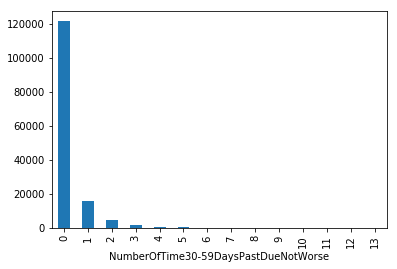

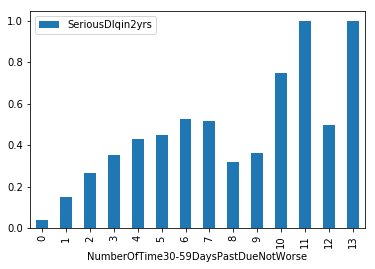

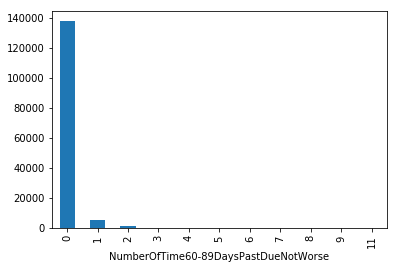

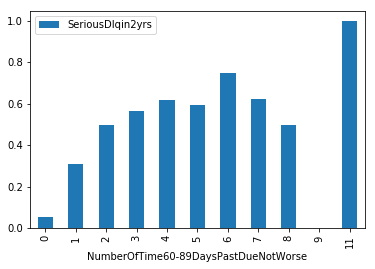

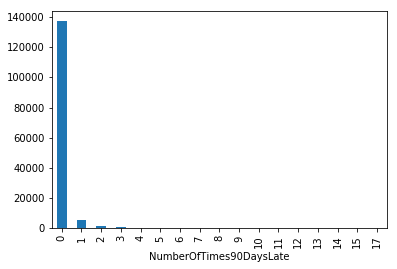

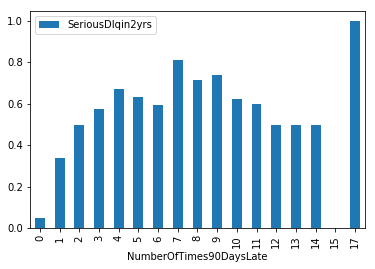

In [26]:

#NumberOfTime30-59DaysPastDueNotWorse
data.groupby(['NumberOfTime30-59DaysPastDueNotWorse'])['NumberOfTime30-59DaysPastDueNotWorse'].count().plot.bar()
plt.show()
data[['NumberOfTime30-59DaysPastDueNotWorse','SeriousDlqin2yrs']].groupby(['NumberOfTime30-59DaysPastDueNotWorse']).mean().plot.bar()
plt.show()

#NumberOfTime60-89DaysPastDueNotWorse
data.groupby(['NumberOfTime60-89DaysPastDueNotWorse'])['NumberOfTime60-89DaysPastDueNotWorse'].count().plot.bar()
plt.show()
data[['NumberOfTime60-89DaysPastDueNotWorse','SeriousDlqin2yrs']].groupby(['NumberOfTime60-89DaysPastDueNotWorse']).mean().plot.bar()
plt.show()

#NumberOfTimes90DaysLate
data.groupby(['NumberOfTimes90DaysLate'])['NumberOfTimes90DaysLate'].count().plot.bar()
plt.show()
data[['NumberOfTimes90DaysLate','SeriousDlqin2yrs']].groupby(['NumberOfTimes90DaysLate']).mean().plot.bar()
plt.show()

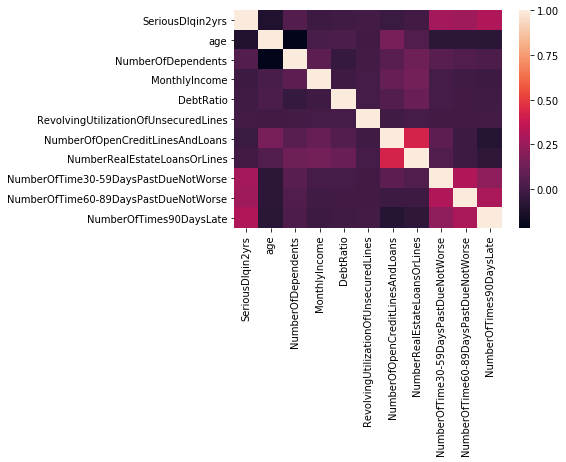

In [27]:
#探索特征间的相关关系
sns.heatmap(data.corr())
plt.show()

In [30]:
data.to_csv('data.csv',index=False)